In [7]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch


In [9]:
data = pd.read_csv('./ml_data_new.csv', index_col=0)
data = data.loc[:,['last_tx_in_days','date_creation_diff','gas','gas_price','is_published','verified']]
data

,last_tx_in_days,date_creation_diff,gas,gas_price,is_published,verified
0,65,438,401230,50000000000,1,1
1,2,0,975747,220000000000,1,1
2,11,-1,1921440,280000000000,1,1
3,2,-1,1921440,280000000000,1,1
4,-1,-1,1418783,280000000000,1,1
...,...,...,...,...,...,...
731,720,149,2562844,136000000000,1,0
732,3,59,2794383,81000000000,1,0
733,0,0,2013399,71953123116,1,1
734,-1,0,2859074,112131911642,1,1


Visualisation of the date_creation_diff feature

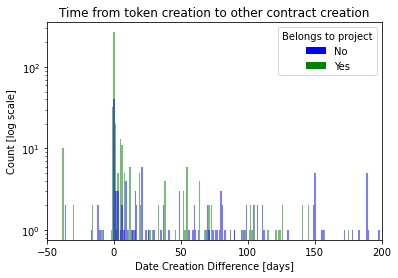

In [10]:
# Create the histogram
palette = {0: 'blue', 1: 'green'}
sns.histplot(data=data, x='date_creation_diff', hue='verified', bins=10, alpha=0.5, palette=palette, discrete=True)

# Add labels
plt.title('Time from token creation to other contract creation')
plt.xlabel('Date Creation Difference [days]')
plt.ylabel('Count [log scale]')
plt.yscale('log')

legend_elements = [
    Patch(facecolor=palette[0], label='No'),
    Patch(facecolor=palette[1], label='Yes')]
plt.legend(handles=legend_elements, title='Belongs to project', loc='upper right')
lower_bound = -50
upper_bound = 200
plt.xlim(lower_bound, upper_bound)
# Display the plot
plt.show()

Visualisation of the last_tx_in_days feature

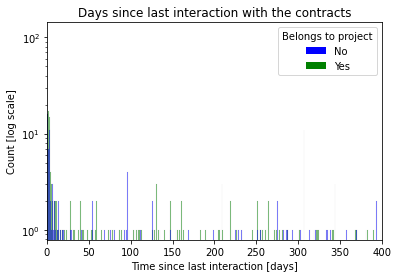

In [11]:
# Create the histogram
palette = {0: 'blue', 1: 'green'}
sns.histplot(data=data, x='last_tx_in_days', hue='verified', bins=10, alpha=0.5, palette=palette, discrete=True)

# Add labels
plt.title('Days since last interaction with the contracts')
plt.xlabel('Time since last interaction [days]')
plt.ylabel('Count [log scale]')
plt.yscale('log')

legend_elements = [
    Patch(facecolor=palette[0], label='No'),
    Patch(facecolor=palette[1], label='Yes')]
plt.legend(handles=legend_elements, title='Belongs to project', loc='upper right')

lower_bound = 0
upper_bound = 400
plt.xlim(lower_bound, upper_bound)
# Display the plot
plt.show()

Gas distribution

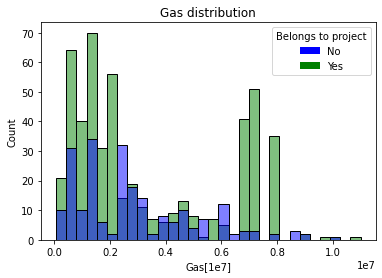

In [12]:
palette = {0: 'blue', 1: 'green'}
sns.histplot(data=data, x='gas', hue='verified', bins=30, alpha=0.5, palette=palette)

# Add labels
plt.title('Gas distribution')
plt.xlabel('Gas[1e7]')
plt.ylabel('Count')

legend_elements = [
    Patch(facecolor=palette[0], label='No'),
    Patch(facecolor=palette[1], label='Yes')]
plt.legend(handles=legend_elements, title='Belongs to project', loc='upper right')


# Display the plot
plt.show()

Gas price distribution

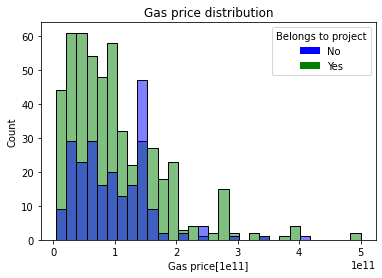

In [13]:
palette = {0: 'blue', 1: 'green'}
sns.histplot(data=data, x='gas_price', hue='verified', bins=30, alpha=0.5, palette=palette)

# Add labels
plt.title('Gas price distribution')
plt.xlabel('Gas price[1e11]')
plt.ylabel('Count')

legend_elements = [
    Patch(facecolor=palette[0], label='No'),
    Patch(facecolor=palette[1], label='Yes')]
plt.legend(handles=legend_elements, title='Belongs to project', loc='upper right')


# Display the plot
plt.show()

Visualisation of verification

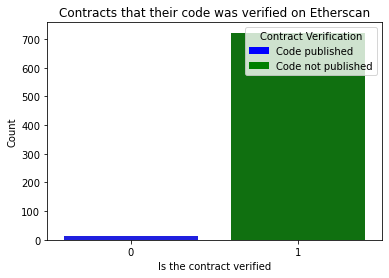

In [14]:

# Create the histogram
palette = {0: 'blue', 1: 'green'}

sns.countplot(data=data, x='is_published', palette=palette)

# Add labels
plt.title('Contracts that their code was verified on Etherscan')
plt.xlabel('Is the contract verified')
plt.ylabel('Count')
legend_elements = [
    Patch(facecolor=palette[0], label='Code published'),
    Patch(facecolor=palette[1], label='Code not published')
]
plt.legend(handles=legend_elements, title='Contract Verification', loc='upper right')

# Display the plot
plt.show()

splitting the data into train and test

In [15]:
from sklearn.model_selection import train_test_split
y = data.verified.values
X =data.iloc[:, :-1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

now we will create a decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.model_selection import cross_val_predict

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3)

# Use cross_val_predict to get the predicted labels for each sample in the training set
y_pred_train = cross_val_predict(clf, X_train, y_train, cv=5)

# Calculate the performance metrics for the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
train_precision = precision_score(y_train, y_pred_train, average='weighted')

print("Training accuracy: %0.2f " % (train_accuracy))
print("Training F1-score: %0.2f" % train_f1)
print("Training recall: %0.2f" % train_recall)
print("Training precision: %0.2f" % train_precision)

dt_metrics = {
    'Model': 'Decision Tree',
    'Mean Accuracy': train_accuracy,
    'Mean F1-score': train_f1,
    'Mean Recall': train_recall,
    'Mean Precision': train_precision
}
# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Calculate performance metrics for the test set
y_pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_precision = precision_score(y_test, y_pred_test, average='weighted')

print("Test accuracy: %0.2f " % (test_accuracy))
print("Test F1-score: %0.2f" % test_f1)
print("Test recall: %0.2f" % test_recall)
print("Test precision: %0.2f" % test_precision)

Training accuracy: 0.76 
Training F1-score: 0.76
Training recall: 0.76
Training precision: 0.76
Test accuracy: 0.76 
Test F1-score: 0.77
Test recall: 0.76
Test precision: 0.78


last_tx_in_days: 0.0775344144259368
date_creation_diff: 0.6334846635288107
gas: 0.10111412138054952
gas_price: 0.18786680066470296
is_published: 0.0


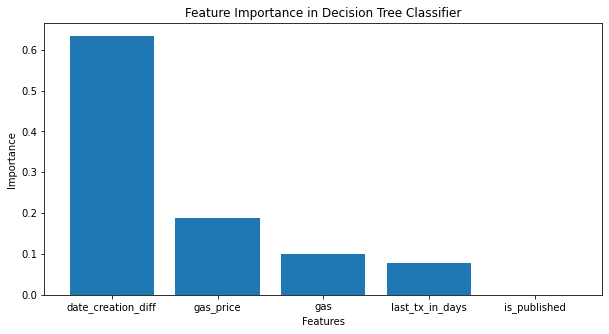

0.0

In [17]:
importances = clf.feature_importances_

# Print feature importance for each feature
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Classifier')
plt.show()
importance

Visualizing the decision tree

In [18]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=['last_tx_in_days', 'date_creation_diff', 'gas', 'gas_price','is_published'],  
                                # class_names=[0,1],  
                                filled=True, rounded=True,  
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Now we will use Random Forest model

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set the parameters for grid search
param_grid = {'max_depth': list(range(1, 8))}  # You can adjust the range depending on your needs

# Create an instance of the RandomForest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='f1_weighted', return_train_score=True)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Use the best parameters to create the optimum model
optimum_rf_clf = grid_search.best_estimator_


Best parameters:  {'max_depth': 3}
Best score:  0.7182334460132362


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.model_selection import cross_val_predict

# Create an instance of the random forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Use cross_val_predict to get the predicted labels for each sample in the training set
y_pred_train = cross_val_predict(rf_clf, X_train, y_train, cv=5)

# Calculate the performance metrics for the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)

print("Training accuracy: %0.2f " % (train_accuracy))
print("Training F1-score: %0.2f" % train_f1)
print("Training recall: %0.2f" % train_recall)
print("Training precision: %0.2f" % train_precision)
rf_metrics = {
    'Model': 'Random Forest',
    'Mean Accuracy': train_accuracy,
    'Mean F1-score': train_f1,
    'Mean Recall': train_recall,
    'Mean Precision': train_precision
}
# Fit the classifier on the training data
rf_clf.fit(X_train, y_train)

# Calculate performance metrics for the test set
y_pred_test = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

print("Test accuracy: %0.2f " % (test_accuracy))
print("Test F1-score: %0.2f" % test_f1)
print("Test recall: %0.2f" % test_recall)
print("Test precision: %0.2f" % test_precision)

Training accuracy: 0.86 
Training F1-score: 0.90
Training recall: 0.92
Training precision: 0.88
Test accuracy: 0.81 
Test F1-score: 0.86
Test recall: 0.89
Test precision: 0.84


Now we will use Logistic Reggression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.model_selection import cross_val_predict

# Create an instance of the logistic regression classifier
logreg = LogisticRegression()

# Use cross_val_predict to get the predicted labels for each sample in the training set
y_pred_train = cross_val_predict(logreg, X_train, y_train, cv=5)

# Calculate the performance metrics for the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)

print("Training accuracy: %0.2f " % (train_accuracy))
print("Training F1-score: %0.2f" % train_f1)
print("Training recall: %0.2f" % train_recall)
print("Training precision: %0.2f" % train_precision)
logreg_metrics = {
    'Model': 'Logistic Regression',
    'Mean Accuracy': train_accuracy,
    'Mean F1-score': train_f1,
    'Mean Recall': train_recall,
    'Mean Precision': train_precision
}
# Fit the classifier on the training data
logreg.fit(X_train, y_train)

# Calculate performance metrics for the test set
y_pred_test = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

print("Test accuracy: %0.2f " % (test_accuracy))
print("Test F1-score: %0.2f" % test_f1)
print("Test recall: %0.2f" % test_recall)
print("Test precision: %0.2f" % test_precision)


Training accuracy: 0.70 
Training F1-score: 0.83
Training recall: 1.00
Training precision: 0.70
Test accuracy: 0.68 
Test F1-score: 0.81
Test recall: 1.00
Test precision: 0.68


In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

# Create an instance of the XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Use cross_val_predict to get the predicted labels for each sample in the training set
y_pred_train = cross_val_predict(xgb_clf, X_train, y_train, cv=5)

# Calculate the performance metrics for the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)

print("Training accuracy: %0.2f " % (train_accuracy))
print("Training F1-score: %0.2f" % train_f1)
print("Training recall: %0.2f" % train_recall)
print("Training precision: %0.2f" % train_precision)
xg_metrics = {
    'Model': 'Xgboost',
    'Mean Accuracy': train_accuracy,
    'Mean F1-score': train_f1,
    'Mean Recall': train_recall,
    'Mean Precision': train_precision
}
# Fit the classifier on the training data
xgb_clf.fit(X_train, y_train)

# Calculate performance metrics for the test set
y_pred_test = xgb_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

print("Test accuracy: %0.2f " % (test_accuracy))
print("Test F1-score: %0.2f" % test_f1)
print("Test recall: %0.2f" % test_recall)
print("Test precision: %0.2f" % test_precision)

ModuleNotFoundError: No module named 'xgboost'

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

# Create an instance of the SVM classifier
svm_clf = SVC()

# Use cross_val_predict to get the predicted labels for each sample in the training set
y_pred_train = cross_val_predict(svm_clf, X_train, y_train, cv=5)

# Calculate the performance metrics for the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)

print("Training accuracy: %0.2f " % (train_accuracy))
print("Training F1-score: %0.2f" % train_f1)
print("Training recall: %0.2f" % train_recall)
print("Training precision: %0.2f" % train_precision)
svm_metrics = {
    'Model': 'SVM',
    'Mean Accuracy': train_accuracy,
    'Mean F1-score': train_f1,
    'Mean Recall': train_recall,
    'Mean Precision': train_precision
}
# Fit the classifier on the training data
svm_clf.fit(X_train, y_train)

# Calculate performance metrics for the test set
y_pred_test = svm_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)

print("Test accuracy: %0.2f " % (test_accuracy))
print("Test F1-score: %0.2f" % test_f1)
print("Test recall: %0.2f" % test_recall)
print("Test precision: %0.2f" % test_precision)


Training accuracy: 0.70 
Training F1-score: 0.83
Training recall: 1.00
Training precision: 0.70
Test accuracy: 0.68 
Test F1-score: 0.81
Test recall: 1.00
Test precision: 0.68


In [16]:
# Combine metrics into a list of dictionaries
model_metrics = [dt_metrics, logreg_metrics,xg_metrics,svm_metrics, rf_metrics]

# Create a DataFrame to display the metrics
summary_df = pd.DataFrame(model_metrics)
# Move "Mean F1-score" column to first position
f1_score_col = summary_df.pop("Mean F1-score")
summary_df.insert(1, "Mean F1-score", f1_score_col)

summary_df = summary_df.sort_values(by='Mean F1-score', ascending=False)
# Display the summary DataFrame
summary_df.reset_index(inplace=True)
summary_df.drop(columns='index',inplace=True)
summary_df

,Model,Mean F1-score,Mean Accuracy,Mean Recall,Mean Precision
0,Random Forest,0.901775,0.858844,0.920290,0.883991
1,Xgboost,0.895171,0.848639,0.917874,0.873563
2,Logistic Regression,0.826347,0.704082,1.000000,0.704082
3,SVM,0.826347,0.704082,1.000000,0.704082
4,Decision Tree,0.758891,0.756803,0.756803,0.761525
